# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [250]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime as dt # for the datestamp on the output
import json
from pprint import pprint
import seaborn as sb


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List for holding coordinates(lat and longs) and cities
coordinates = []
cities = []
country = []
latitud = []
longitude = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
longs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
coordinates = zip(lats, longs)

# Identify nearest city for each lat, lng combination
for coord in coordinates:
    #lats,longs= coord
    city = citipy.nearest_city(coord[0], coord[1])
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city.city_name)
        country.append(city.country_code)
        latitud.append(coord[0])
        longitude.append(coord[1])

# Print the city count to confirm sufficient count
print("Cities", len(cities))
print("Country", len(country))
print("Lats", len(latitud))
print("Longs", len(longitude))

In [192]:
# Creting the DataFrame with the nearest cities from the random coordinates 
city_dict={
    "Latitud":latitud,"Longitude":longitude,"City":cities,"Country":country}

cities_df= pd.DataFrame.from_dict(city_dict,orient='index').transpose()
cities_df


,Latitud,Longitude,City,Country
0,-42.188357,-131.575224,rikitea,pf
1,65.357541,134.344232,batagay,ru
2,41.048498,116.651669,shunyi,cn
3,44.446879,152.207302,sentyabrskiy,ru
4,-18.320522,140.214132,mount isa,au
...,...,...,...,...
1495,54.200582,80.613844,kochki,ru
1496,87.189446,5.65054,barentsburg,sj
1497,83.635681,139.934287,nizhneyansk,ru
1498,63.2802,134.581004,khandyga,ru


In [193]:
cities_clean = cities_df.drop_duplicates("City",keep="first")
cities_clean

,Latitud,Longitude,City,Country
0,-42.188357,-131.575224,rikitea,pf
1,65.357541,134.344232,batagay,ru
2,41.048498,116.651669,shunyi,cn
3,44.446879,152.207302,sentyabrskiy,ru
4,-18.320522,140.214132,mount isa,au
...,...,...,...,...
1483,67.923008,8.21084,sistranda,no
1489,-12.061732,37.841251,masuguru,tz
1491,12.48169,108.652142,nha trang,vn
1495,54.200582,80.613844,kochki,ru


In [194]:
# Reindex DataFrame
cities_clean= cities_clean.reset_index(drop=True)
len(cities_clean)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [195]:
#Weather information, saving config information

# New URL "api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}"

url_current = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Set lists to replace latitud and longitude for nearest city to actual coordinates of city
actual_lat = []
actual_long = []

# Setting new weather parameters to retrieve

maxTemp = []
humidity = []
cloudiness = []
windSpeed = []
infoDate = []
city_success = []

# Variables used in the for loop for printings
# Printing the number of record 
num_record = 0
# Printing the number of set starting from 1 changing the number of sets
num_set = 1
# Printing the name of the current city
city_curr= []
country_success =[]

# Printing first message of retrieval of data
print('''Beginning Data Retrieval     
-----------------------------''')

# Looping through all the cities for weather information retrieving
for index,row in cities_clean.iterrows():
    curr_city= row["City"]
    curr_country= row["Country"]
      
# Build query URL
    query_url =f"{url_current}q={curr_city},{curr_country}&units={units}&appid={weather_api_key}"
               
                
    response= requests.get(query_url).json()
    #print(response)
# Creating Exceptions to continue runnig the code
    num_record = num_record + 1
    try:
        actual_lat.append(response["coord"]["lat"])
        actual_long.append(response["coord"]["lon"])
        maxTemp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        windSpeed.append(response["wind"]["speed"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        infoDate.append(response["dt"])
        city_success.append(curr_city)
        country_success.append(curr_country)
        
        # Integrating the information retrieved
       
        
        print(f"Processing Record {num_record} of Set {num_set}| {curr_city}")
        
    except:
        #actual_lat.append(np.nan)
        #actual_long.append(np.nan)
        #maxTemp.append(np.nan)
        #humidity.append(np.nan)
        #windSpeed.append(np.nan)
        #cloudiness.append(np.nan)
        #infoDate.append(np.nan)
        print(f"City not found. Skipping...")
        
        if num_record == 35:
            num_set = num_set+1
            num_record = 0
            # Time between them
            time.sleep(6)
            
    #if index == 5:
     #   break
            
print('''-----------------------------
Data Retrieval Complete      
-----------------------------''')


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1| rikitea
Processing Record 2 of Set 1| batagay
Processing Record 3 of Set 1| shunyi
City not found. Skipping...
Processing Record 5 of Set 1| mount isa
Processing Record 6 of Set 1| jadu
Processing Record 7 of Set 1| alofi
Processing Record 8 of Set 1| ossora
Processing Record 9 of Set 1| sao filipe
Processing Record 10 of Set 1| bethel
City not found. Skipping...
Processing Record 12 of Set 1| bluff
Processing Record 13 of Set 1| lebu
Processing Record 14 of Set 1| hovd
Processing Record 15 of Set 1| saint-philippe
Processing Record 16 of Set 1| nkhotakota
City not found. Skipping...
Processing Record 18 of Set 1| qaanaaq
Processing Record 19 of Set 1| avarua
Processing Record 20 of Set 1| esperance
Processing Record 21 of Set 1| husavik
Processing Record 22 of Set 1| busselton
Processing Record 23 of Set 1| ushuaia
Processing Record 24 of Set 1| birao
Processing Record 25 of Set 1| westport
Proce

Processing Record 207 of Set 1| carlagan
Processing Record 208 of Set 1| lavrentiya
Processing Record 209 of Set 1| trofors
Processing Record 210 of Set 1| akranes
Processing Record 211 of Set 1| victoria
Processing Record 212 of Set 1| tiksi
Processing Record 213 of Set 1| mouila
City not found. Skipping...
Processing Record 215 of Set 1| galbshtadt
Processing Record 216 of Set 1| ulladulla
Processing Record 217 of Set 1| faanui
Processing Record 218 of Set 1| karpathos
Processing Record 219 of Set 1| bathsheba
Processing Record 220 of Set 1| roald
Processing Record 221 of Set 1| pringsewu
City not found. Skipping...
Processing Record 223 of Set 1| boca do acre
Processing Record 224 of Set 1| akyab
Processing Record 225 of Set 1| plettenberg bay
Processing Record 226 of Set 1| preobrazheniye
City not found. Skipping...
Processing Record 228 of Set 1| gushikawa
Processing Record 229 of Set 1| cabra
Processing Record 230 of Set 1| gurupa
City not found. Skipping...
Processing Record 232

Processing Record 413 of Set 1| solton
Processing Record 414 of Set 1| ayagoz
Processing Record 415 of Set 1| lisakovsk
Processing Record 416 of Set 1| hamilton
Processing Record 417 of Set 1| broome
Processing Record 418 of Set 1| svetlaya
Processing Record 419 of Set 1| ceres
Processing Record 420 of Set 1| takoradi
Processing Record 421 of Set 1| homer
Processing Record 422 of Set 1| sikonge
Processing Record 423 of Set 1| camacha
Processing Record 424 of Set 1| kaseda
City not found. Skipping...
Processing Record 426 of Set 1| plainview
Processing Record 427 of Set 1| chulym
Processing Record 428 of Set 1| bilibino
Processing Record 429 of Set 1| kavieng
Processing Record 430 of Set 1| sungaipenuh
Processing Record 431 of Set 1| vao
Processing Record 432 of Set 1| chuy
Processing Record 433 of Set 1| namwala
Processing Record 434 of Set 1| pietersburg
Processing Record 435 of Set 1| el paujil
Processing Record 436 of Set 1| hunucma
City not found. Skipping...
Processing Record 438 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [223]:
# Print the city count to confirm sufficient count
print("City", len(city_success))
print("Lat", len(actual_lat))
print("Lng", len(actual_long))
print("Max Temp", len(maxTemp))
print("Humidity", len(humidity))
print("Cloudiness", len(cloudiness))
print("Wind Speed", len(windSpeed))
print("Country", len(country_success))
print("Date", len(infoDate))


City 552
Lat 552
Lng 552
Max Temp 552
Humidity 552
Cloudiness 552
Wind Speed 552
Country 552
Date 552


In [224]:
# Display the DataFrame
cities_weather_df= pd.DataFrame({"City":city_success,"Lat":actual_lat,"Lng":actual_long,"Max Temp":maxTemp,
                                 "Humidity":humidity,"Cloudiness":cloudiness,"Wind Speed":windSpeed,
                                 "Country":country_success,"Date":infoDate})

In [225]:
# Save dataframe in output_data file. Export the city data into a .csv.

cities_weather_df.to_csv("output_data/weather_city_data.csv", index=False, header=True)


In [226]:
cities_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,76.08,71,100,10.11,pf,1619723338
1,batagay,67.6333,134.6333,19.67,97,99,2.08,ru,1619723338
2,shunyi,40.1250,116.6453,51.01,65,0,2.24,cn,1619723339
3,mount isa,-20.7333,139.5000,62.60,48,0,1.14,au,1619723339
4,jadu,31.9530,12.0261,80.73,11,5,4.36,ly,1619723340
...,...,...,...,...,...,...,...,...,...
547,sistranda,63.7256,8.8340,39.20,70,20,9.22,no,1619723589
548,masuguru,-11.3667,38.4167,72.37,96,10,2.77,tz,1619723589
549,nha trang,12.2500,109.1833,77.00,83,20,3.44,vn,1619723589
550,kochki,54.3358,80.4806,45.72,83,10,11.32,ru,1619723590


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [227]:
stats = cities_weather_df.describe()
stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02
mean,18.764137,19.514361,62.384620,71.268116,56.813406,7.627772,1.619723e+09
std,33.814910,91.445544,19.660724,22.179531,39.451912,4.911145,9.068633e+01
min,-54.800000,-175.200000,-2.240000,1.000000,0.000000,0.340000,1.619723e+09
25%,-8.538075,-63.186450,48.290000,61.000000,15.500000,3.870000,1.619723e+09
50%,19.939850,24.982350,66.200000,76.000000,75.000000,6.910000,1.619723e+09
75%,48.129425,102.334775,78.800000,89.000000,98.000000,10.360000,1.619724e+09
max,78.218600,179.316700,105.800000,100.000000,100.000000,29.950000,1.619724e+09


In [228]:
cities_weather_df.value_counts()

City         Lat       Lng        Max Temp  Humidity  Cloudiness  Wind Speed  Country  Date      
abu kamal     34.4506   40.9171   85.35     17        0           9.44        sy       1619723587    1
plainview     40.7765  -73.4673   70.00     68        75          10.36       us       1619723436    1
phalia        32.4297   73.5775   79.18     39        100         5.86        pk       1619723528    1
pierre        44.3683  -100.3510  64.40     27        1           5.19        us       1619723544    1
pietersburg  -23.9045   29.4688   62.60     59        5           1.14        za       1619723513    1
                                                                                                    ..
hasaki        35.7333   140.8333  59.00     100       75          4.61        jp       1619723344    1
hartselle     34.4434  -86.9353   79.00     65        40          9.22        us       1619723538    1
harrisburg    40.2737  -76.8844   69.01     92        100         1.99        

In [229]:
#  Get the indices of cities that have humidity over 100%.
hum = cities_weather_df.loc[(cities_weather_df["Humidity"] > 100),:]


In [230]:
# No citis with Humidity > 100
print(hum)

Empty DataFrame
Columns: [City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date]
Index: []


In [231]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_weather_df.drop_duplicates("City",keep="first")
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,76.08,71,100,10.11,pf,1619723338
1,batagay,67.6333,134.6333,19.67,97,99,2.08,ru,1619723338
2,shunyi,40.1250,116.6453,51.01,65,0,2.24,cn,1619723339
3,mount isa,-20.7333,139.5000,62.60,48,0,1.14,au,1619723339
4,jadu,31.9530,12.0261,80.73,11,5,4.36,ly,1619723340
...,...,...,...,...,...,...,...,...,...
547,sistranda,63.7256,8.8340,39.20,70,20,9.22,no,1619723589
548,masuguru,-11.3667,38.4167,72.37,96,10,2.77,tz,1619723589
549,nha trang,12.2500,109.1833,77.00,83,20,3.44,vn,1619723589
550,kochki,54.3358,80.4806,45.72,83,10,11.32,ru,1619723590


In [232]:
clean_city_data.reset_index()


,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,rikitea,-23.1203,-134.9692,76.08,71,100,10.11,pf,1619723338
1,1,batagay,67.6333,134.6333,19.67,97,99,2.08,ru,1619723338
2,2,shunyi,40.1250,116.6453,51.01,65,0,2.24,cn,1619723339
3,3,mount isa,-20.7333,139.5000,62.60,48,0,1.14,au,1619723339
4,4,jadu,31.9530,12.0261,80.73,11,5,4.36,ly,1619723340
...,...,...,...,...,...,...,...,...,...,...
547,547,sistranda,63.7256,8.8340,39.20,70,20,9.22,no,1619723589
548,548,masuguru,-11.3667,38.4167,72.37,96,10,2.77,tz,1619723589
549,549,nha trang,12.2500,109.1833,77.00,83,20,3.44,vn,1619723589
550,550,kochki,54.3358,80.4806,45.72,83,10,11.32,ru,1619723590


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

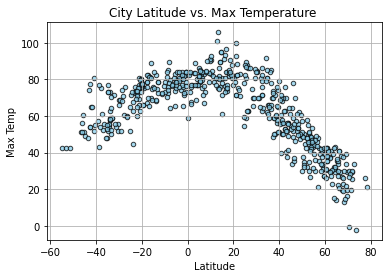

In [233]:
# Create a scatter plot which compares MPG to horsepower
clean_city_data.plot(kind="scatter", x="Lat", y="Max Temp", color="skyblue", alpha=0.75, edgecolors = "black",
              title="City Latitude vs. Max Temperature ")
plt.grid (b=True, which="major",axis="both",linestyle="-") 
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

plt.savefig("Figures/Fig-1_Latitude_vs_Max Temp.png")

## Latitude vs. Humidity Plot

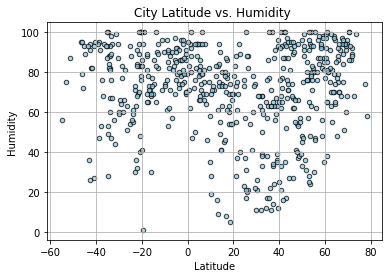

In [234]:
clean_city_data.plot(kind="scatter", x="Lat", y="Humidity", color="skyblue", alpha=0.75, edgecolors = "black",
              title="City Latitude vs. Humidity ")
plt.grid (b=True, which="major",axis="both",linestyle="-")  
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

plt.savefig("Figures/Fig-2_Latitude_vs_Humidity.png")

## Latitude vs. Cloudiness Plot

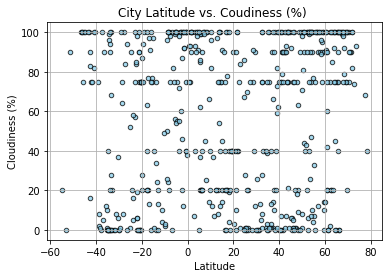

In [235]:
clean_city_data.plot(kind="scatter", x="Lat", y="Cloudiness", color="skyblue", alpha=0.75, edgecolors = "black",
              title="City Latitude vs. Coudiness (%) ")
plt.grid (b=True, which="major",axis="both",linestyle="-")  
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

plt.savefig("Figures/Fig-3_Latitude_vs_Cloudiness.png")

## Latitude vs. Wind Speed Plot

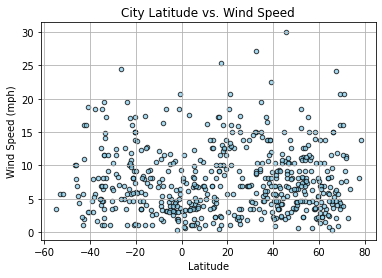

In [236]:
clean_city_data.plot(kind="scatter", x="Lat", y="Wind Speed", color="skyblue", alpha=0.75, edgecolors = "black",
              title="City Latitude vs. Wind Speed ")
plt.grid (b=True, which="major",axis="both",linestyle="-")  

plt.title(f"City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=True, which="major",axis="both",linestyle="-") 
plt.show()

plt.savefig("Figures/Fig-4_Latitude_vs_Wind Speed.png")

## Linear Regression

In [237]:
# Using the fucntion .loc to filter the values < or > than 0. Important, use the original DF, otherwise not possible to do it.

Northern_Hemisphere = cities_weather_df.loc[cities_weather_df["Lat"] > 0]

Southern_Hemisphere = cities_weather_df.loc[cities_weather_df["Lat"] < 0]

In [238]:
Northern_Hemisphere

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,batagay,67.6333,134.6333,19.67,97,99,2.08,ru,1619723338
2,shunyi,40.1250,116.6453,51.01,65,0,2.24,cn,1619723339
4,jadu,31.9530,12.0261,80.73,11,5,4.36,ly,1619723340
6,ossora,59.2353,163.0719,33.89,98,100,1.97,ru,1619723341
7,sao filipe,14.8961,-24.4956,71.73,80,45,10.09,cv,1619723341
...,...,...,...,...,...,...,...,...,...
545,dingle,52.1408,-10.2689,48.20,76,90,6.91,ie,1619723588
547,sistranda,63.7256,8.8340,39.20,70,20,9.22,no,1619723589
549,nha trang,12.2500,109.1833,77.00,83,20,3.44,vn,1619723589
550,kochki,54.3358,80.4806,45.72,83,10,11.32,ru,1619723590


In [239]:
Southern_Hemisphere 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,76.08,71,100,10.11,pf,1619723338
3,mount isa,-20.7333,139.5000,62.60,48,0,1.14,au,1619723339
5,alofi,-19.0595,-169.9187,75.20,100,100,1.14,nu,1619723340
9,bluff,-46.6000,168.3333,51.01,95,100,10.00,nz,1619723342
10,lebu,-37.6167,-73.6500,61.21,76,100,5.66,cl,1619723342
...,...,...,...,...,...,...,...,...,...
538,lorengau,-2.0226,147.2712,80.19,81,12,3.96,pg,1619723585
540,karoi,-16.8099,29.6925,65.71,71,13,4.70,zw,1619723585
542,viedma,-40.8135,-62.9967,80.58,27,100,18.79,ar,1619723586
546,san pedro,-24.2313,-64.8661,73.40,56,20,3.44,ar,1619723588


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [240]:
### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7728162120705518


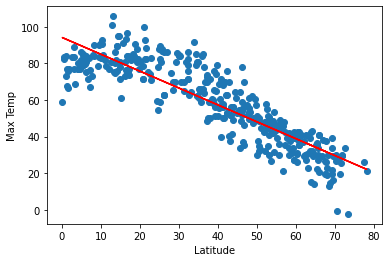

In [241]:
# Add the linear regression equation and line to plot
# Print out the r-squared value along with the plot.
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Figures/Fig-5_NortHemphere_Latitude_vs_Wind Speed_ LinearRegression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [242]:
### Southern Hemisphere- Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5377996817144364


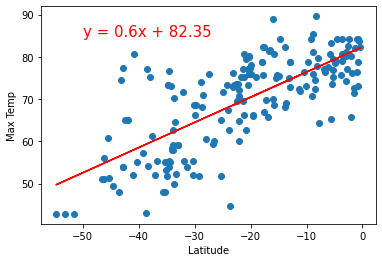

In [243]:
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Figures/Fig-6_SouthHemphere_Latitude_vs_MaxTemp_ LinearRegression.png")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.027512026619823368


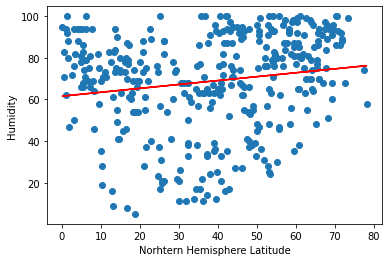

In [244]:
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel('Norhtern Hemisphere Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Figures/Fig-7_NortHemphere_Latitude_vs_Humidity_ LinearRegression.png")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01155253392478398


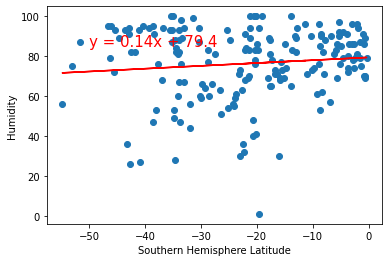

In [245]:
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")

plt.show()
plt.savefig("Figures/Fig-8_SouthHemphere_Latitude_vs_Humidity_ LinearRegression.png")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.015061947196495314


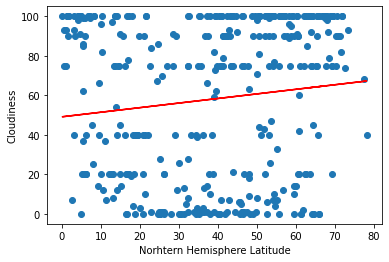

In [246]:
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel('Norhtern Hemisphere Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")

plt.show()
plt.savefig("Figures/Fig-9_NortHemphere_Latitude_vs_Cloudiness_ LinearRegression.png")



####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02240415323870055


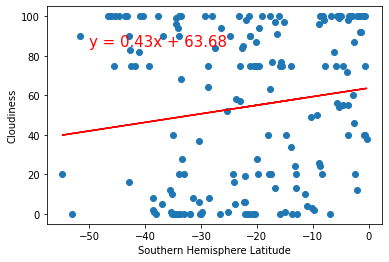

In [247]:
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")

plt.show()
plt.savefig("Figures/Fig-10_SouthHemphere_Latitude_vs_Cloudiness_ LinearRegression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0013235591818734867


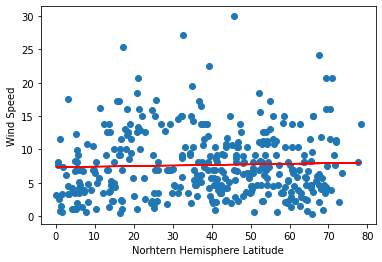

In [248]:
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel('Norhtern Hemisphere Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Figures/Fig-11_NortHemphere_Latitude_vs_Wind Speed_ LinearRegression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.008698034537468386


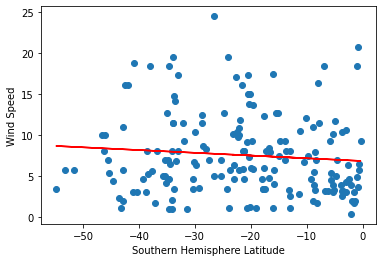

In [249]:
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")

plt.show()

plt.savefig("Figures/Fig12_SouthHemphere_Latitude_vs_Wind Speed_ LinearRegression.png")